<h1 style='text-align: center'> COMSATS University, Islamabad </h1>
<h1 style='text-align: center'> Department of Computer Science </h1>
<h1 style='text-align: center'> CSC483 - Topics in Computer Science II (Programming for Artificial Intelligence) </h1>
<h2 style='text-align: center'> Assignment 01 </h2>
<h2 style='text-align: center'> Submitted by: Waleed Butt SP18-BCS-170 </h2>

### Question
* Assume a 30 x 30 grid. Plot these gridlines in matplotlib.  
* Now take a shearing transformation matrix and apply that on that grid. Plot the n w grid lines.  
* Instead of doing the computation serially on 900 points during the 2nd step in loops, can you parallelize your approach to avoid loops?  

### Submission Procedure:  
* Create a repository in your github account named "assignment", link it with binder, add the binder link to your github repository, and send the github repository link to CR, who will compile all links to an excel sheet and send me that sheet.

### Solution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Normal 30x30 grid. Ranging from -15 to 15

In [2]:
grid = np.column_stack([[x, y] for x in range(-15, 15) for y in range(-15, 15)])
print(grid)
grid.shape

[[-15 -15 -15 ...  14  14  14]
 [-15 -14 -13 ...  12  13  14]]


(2, 900)

### Function to plot a grid

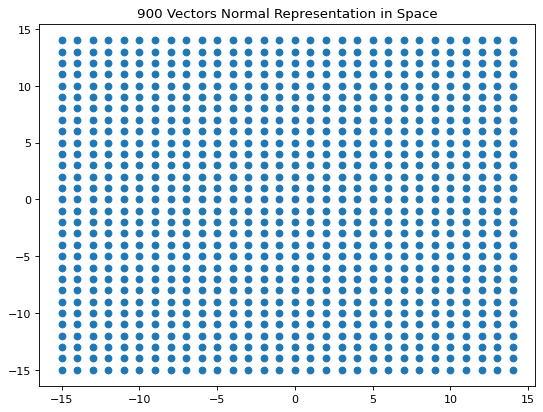

In [3]:
def plot_grid(grid, title='900 Vectors Normal Representation in Space'):
    
    plt.figure(figsize=(8, 6), dpi=80)
    
    plt.title(title)

    plt.scatter(grid[0], grid[1])


plot_grid(grid)

### Normal Plotting of 30x30 grid. Each point generated by cartesian product of x and y

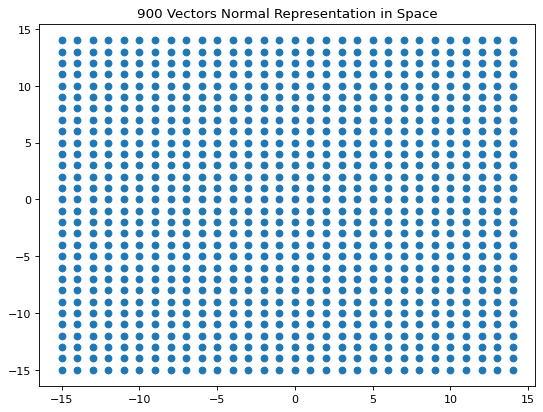

In [4]:
plot_grid(grid)

### Matrix for Shear Transformation (Shear Matrix)

In [5]:
shear_matrix = np.array([1, 1, 0, 1]).reshape(2, 2)
shear_matrix

array([[1, 1],
       [0, 1]])

### Multiplying each point in the grid with Shear Matrix to generate shear transformation of orignal grid

In [6]:
index = 0
sheared_grid = np.zeros((2, 900))

for i in range(-15, 15):
    for j in range(-15, 15):
        
        sheared_grid[0][index], sheared_grid[1][index] = shear_matrix.dot(np.array([i, j]))
        
        index += 1

sheared_grid

array([[-30., -29., -28., ...,  26.,  27.,  28.],
       [-15., -14., -13., ...,  12.,  13.,  14.]])

### Plotting Sheared Grid Obtained by individually multiplying each point with shear matrix

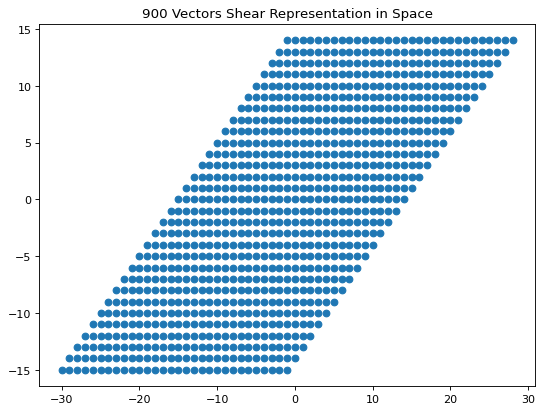

In [7]:
plot_grid(sheared_grid, title='900 Vectors Shear Representation in Space')

### Instead of doing the computation serially on 900 points during the 2nd step in loops, can you parallelize your approach to avoid loops?

#### Yes ! We can do this with help of numpy array. we will create a secondary array of 2x900. where 2 will be x and y coordinate for the each 900 points.

#### Getting Shear Transformed Points

In [8]:
sheared_grid = shear_matrix.dot(grid)
sheared_grid

array([[-30, -29, -28, ...,  26,  27,  28],
       [-15, -14, -13, ...,  12,  13,  14]])

#### Plotting

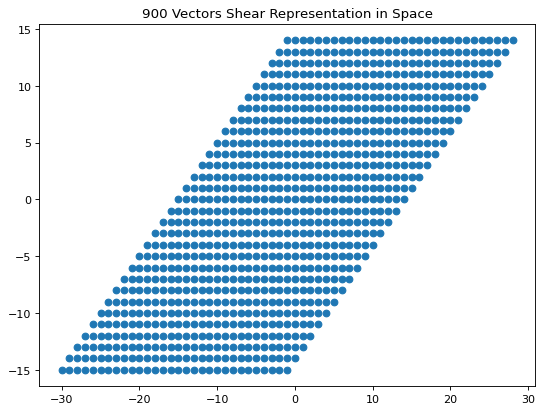

In [9]:
plot_grid(sheared_grid, title='900 Vectors Shear Representation in Space')